In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn import svm
from sklearn.linear_model import Ridge

from sklearn.datasets import fetch_california_housing



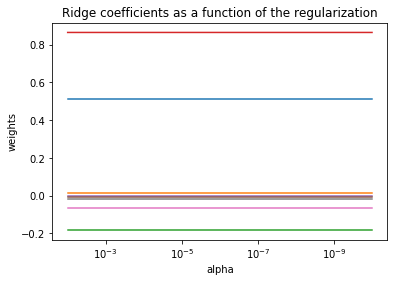

In [15]:
#ridge rigression code
# X is the 10x10 Hilbert matrix
#X,y = fetch_california_housing(return_X_y=True)
data = fetch_california_housing(return_X_y=False)
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [16]:
from sklearn.linear_model import SGDClassifier
data = fetch_california_housing(return_X_y=False)
cali = pd.DataFrame(data.data, columns=data.feature_names)
cali['MedHouseVal']=data.target
cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1defdf50>,
      dtype=object)

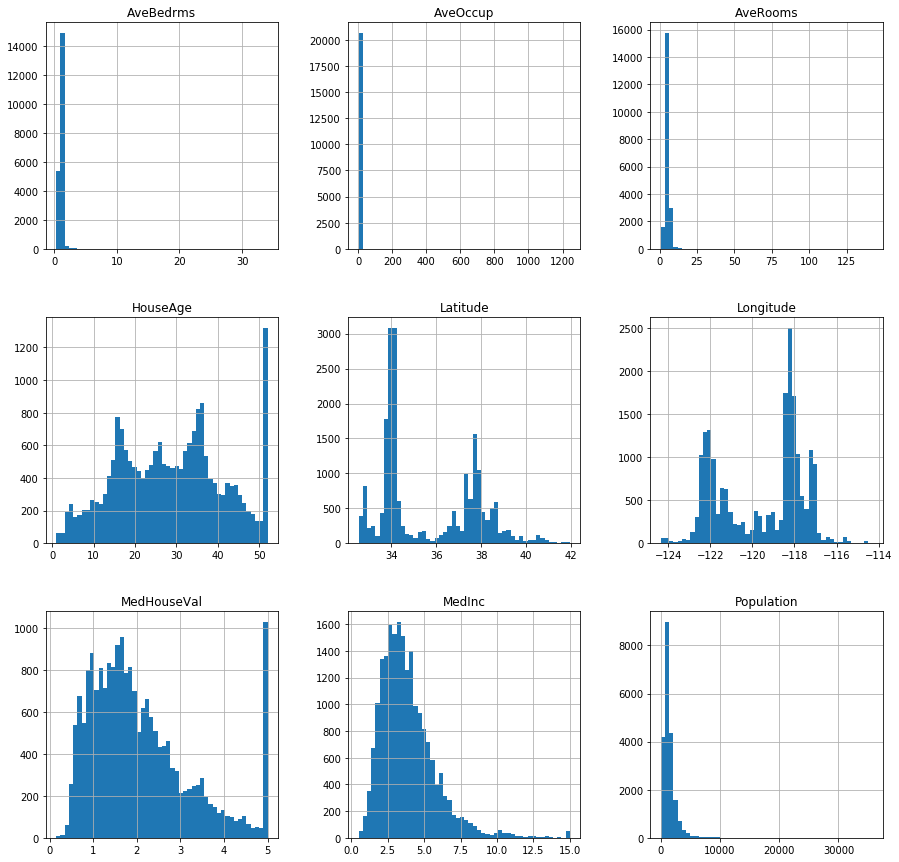

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
cali.hist(bins=50, figsize=(15,15))

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix

In [19]:
attributes=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude','MedHouseVal']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cd190d0>,
      dtype=object)

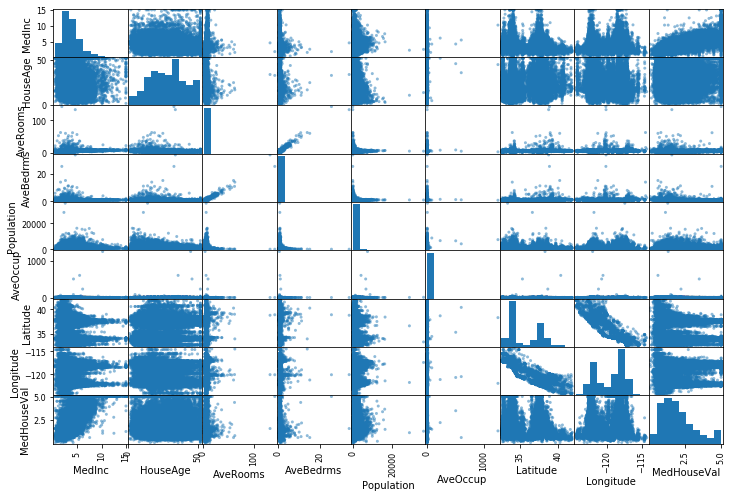

In [20]:

#scatter_matrix(cali[attributes], figsize=(12,8))


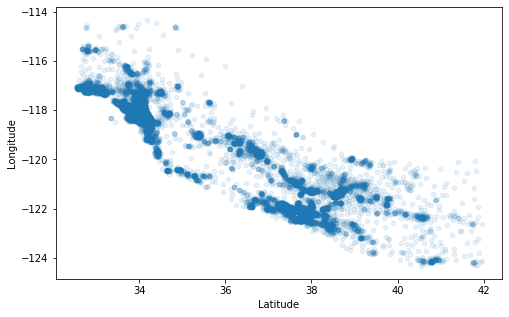

In [21]:
cali.plot(kind='scatter', x='Latitude', y='Longitude',
            alpha=0.1, figsize=(8,5))

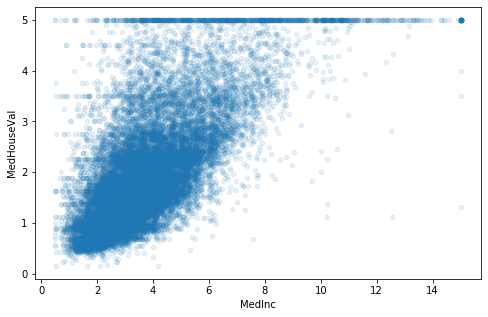

In [23]:
cali.plot(kind='scatter', x='MedInc', y='MedHouseVal',
            alpha=0.1, figsize=(8,5))
x=cali.drop('MedHouseVal',axis=1).values
y=cali['MedHouseVal'].values

In [24]:
#training
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [25]:
#normailize
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
xtrain=ms.fit_transform(xtrain)
xtest=ms.transform(xtest)

In [26]:
def regresssor_model(x,y,estimator):
   
    regressor=estimator()
    regressor.fit(x,y)
    lr_rmse=np.sqrt(mean_squared_error(y,regressor.predict(x)))
    cv_regressor=cross_val_score(cv=10,X=x,y=y,estimator=regressor,scoring='r2')
    print('The cross validated accuracy  - '+str(100*cv_regressor.mean()))
    print('The corss validated variance is - '+str(100*cv_regressor.std()))
    return regressor

In [29]:
l=regresssor_model(xtrain[:,[1]],ytrain,LinearRegression)
evaluate(l.predict(xtest[:,[1]]),ytest,l)
plt.figure(figsize=(15,7))
plt.scatter(xtrain[:,1],ytrain,c=xtrain[:,1])
plt.plot(xtrain[:,1],l.predict(xtrain[:,1:2]),color='red')
plt.xlabel('median income')
plt.ylabel('house value')
plt.show()

NameError: name 'LinearRegression' is not defined

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
Model score (R-squared): 0.61
MSE: 0.57
RMSE: 0.76


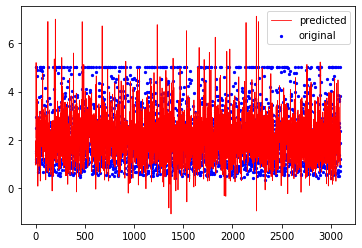

In [12]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from numpy import sqrt

cali = fetch_california_housing(return_X_y=False)
X, y = cali.data, cali.target
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.15)

bay_ridge = BayesianRidge()
print(bay_ridge)
 
bay_ridge.fit(xtrain, ytrain)

score=bay_ridge.score(xtrain, ytrain)
print("Model score (R-squared): %.2f" % score)

ypred = bay_ridge.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % sqrt(mse))

x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()